In [1]:
# Workflow Outline

    # Setup environment
        # load packages
        # import files
    # Data investigation / Correlation between variables
    # Train/test split, use of all data 
    # Data Cleaning
        # Inputation
        # Feature Encoding
        # Drop features
    # Pipeline 
    # Scale data
    # Model Selection
    # Train Model
    # Submit to see fit of model

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker images: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# from sklearn.model_selection import 

# add if needed
    # import matplotlib.pyplot as plt
    # import scikit_learn as sklearn



# Data files available?
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Import needed files

titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# add feature 'succesfully added'

In [4]:
# Top 5 rows of titanic training file

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Top 5 rows of test file

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# 5 number summary, count, mean, standard deviation of each variable in titanic training dataset

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

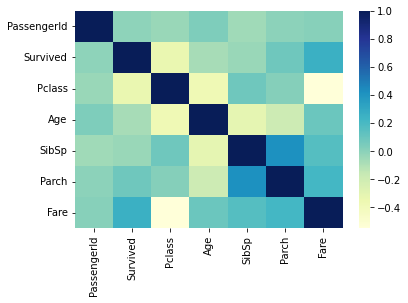

In [7]:
# Correlation heatmap with Yellow, Green, Blue

sns.heatmap(titanic_data.corr(), cmap = 'YlGnBu')

# Fare highly correlated w/ survival
# Pclass highly negaitvely correlated w/ survival
# Plass and Fare are highly negatively correlated
# Male/female needs to be turned into numerical value


In [8]:
# Train test split, stratified shuffle split
# SSP shuffes values randomly and picks 80% for training, 20% for testing. Pick features of high importance and have same distrubution(ex: 1, 0) in training and test data(Survived, PClass, Sex).

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]
    
strat_train_set
# note non numerical columns 'Embarked' and 'Sex'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [9]:
# check distribution of training data variables
# note null values for Age

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 77 to 796
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
# Impute Age with mean

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
        def fit(self, X, y=None):
            return self
            
        def transform(self, X):
            imputer = SimpleImputer(strategy="mean")
            X['Age'] = imputer.fit_transform(X[['Age']])
            return X

In [11]:
# Encode Embarked location to binary columns, Sex to bianary

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i] 
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
            
        column_names = ["Female", "Male"]
            
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [12]:
# Drop unneeded features

class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors='ignore')

In [13]:
# Pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()), 
                     ('featureencoder', FeatureEncoder()), 
                     ('featuredropper', FeatureDropper())])

In [14]:
# Run train dataset through  pipeline, fit.transform functions for each estimator

clean_strat_train_set = pipeline.fit_transform(strat_train_set)

clean_strat_train_set
# note numerical values for 'Sex' and 'Embarked'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
77,78,0,3,30.063708,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
290,291,1,1,26.000000,0,0,78.8500,0.0,0.0,1.0,1.0,0.0
766,767,0,1,30.063708,0,0,39.6000,1.0,0.0,0.0,0.0,1.0
394,395,1,3,24.000000,0,2,16.7000,0.0,0.0,1.0,1.0,0.0
189,190,0,3,36.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,0,3,43.000000,0,0,6.4500,0.0,0.0,1.0,0.0,1.0
344,345,0,2,36.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
61,62,1,1,38.000000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
863,864,0,3,30.063708,8,2,69.5500,0.0,0.0,1.0,1.0,0.0


In [15]:
clean_strat_train_set.info()

# note fixed null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 77 to 796
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
# Scale data

from sklearn.preprocessing import StandardScaler

X = clean_strat_train_set.drop(['Survived'], axis=1)
y = clean_strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Splits data into folds, trains each fold and compares to 1. Done with all possible combinations of folds to cross validate data within training dataset
# Finds optimal hyperparameters 
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

# 3 folds
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [18]:
#play with n_estimators to find the best fitting model

final_clf = grid_search.best_estimator_

final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=10)

In [19]:
# Model selection

from sklearn.ensemble import RandomForestClassifier

# Splits data into folds, trains each fold and compares to 1. Done with all possible combinations of folds to cross validate data within training dataset
# Finds optimal hyperparameters 
from sklearn.model_selection import GridSearchCV

# y = prediction target
# test_y = both test_y and train_y because Survived is only in titanic_data which is what we're testing for
test_y = titanic_data.Survived

# change feature to find better fit
features = ["Sex", "SibSp","Pclass"]

# turns features into 1, 0 dummy variables so we can see who lived and who died in training and testing data
    # training 
train_X = pd.get_dummies(titanic_data[features])
    # testing
test_X = pd.get_dummies(test_data[features])

# specify model
# need to test estimator
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# fit model
# use test_y because test_y = train_y
model.fit(train_X, test_y)

predictions = model.predict(test_X)

In [20]:
# how to create submission for Titanic competition
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
